# Velocity auto correlation functions


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

plt.style.use('scandic')

In [2]:
def velocity_autocorr(v):
    ''' Calculate the velocity autocorrelation function for a given array of velocities. '''
    v = v - np.mean(v)
    corr = np.correlate(v, v, mode='full')
    return corr[len(corr)//2:]

def diffusion_const(time, autocorr):
    ''' Calculate the diffusion constant from the velocity autocorrelation function. '''
    return 1/3 * np.trapz(autocorr, time)    

def diffusion_const_3d(time, v):
    ''' Calculate the diffusion constant from the velocities. '''
    products = np.dot(v[:, 0], v)
    return 1/3 * np.trapz(products, time)

def mean_square_displacement(v, t):
    '''
    Calculate the mean square displacement from the velocities (dir, time) and the time steps.
    '''
    num_steps = v.shape[1]
    msd = np.zeros(num_steps)

    for i in tqdm(range(num_steps), desc='Calculating MSD'):
        delta_t = t[i+1:] - t[i]
        delta_rx = v[0, i+1:] * delta_t
        delta_ry = v[1, i+1:] * delta_t
        delta_rz = v[2, i+1:] * delta_t
        squared_displacement = delta_rx**2 + delta_ry**2 + delta_rz**2
        msd[i] = np.mean(squared_displacement)

    return msd



## calculation fot 0-th file

In [4]:
# read the files
df_0 = pd.read_csv("velocity_trajs/v_0.dat", sep=' ', header=None)
df_0.columns = ['t', 'v_x', 'v_y', 'v_z']

print("Files read.")

# velocity autocorrelation functions
aut_v_x = velocity_autocorr(df_0['v_x'])
aut_v_y = velocity_autocorr(df_0['v_y'])
aut_v_z = velocity_autocorr(df_0['v_z'])

print("Correlations calculated.")

v_0 = np.array([df_0['v_x'].to_numpy(), df_0['v_y'].to_numpy(), df_0['v_z'].to_numpy()])


Files read.
Correlations calculated.


Text(0.5, 1.0, 'Velocity autocorrelation functions.')

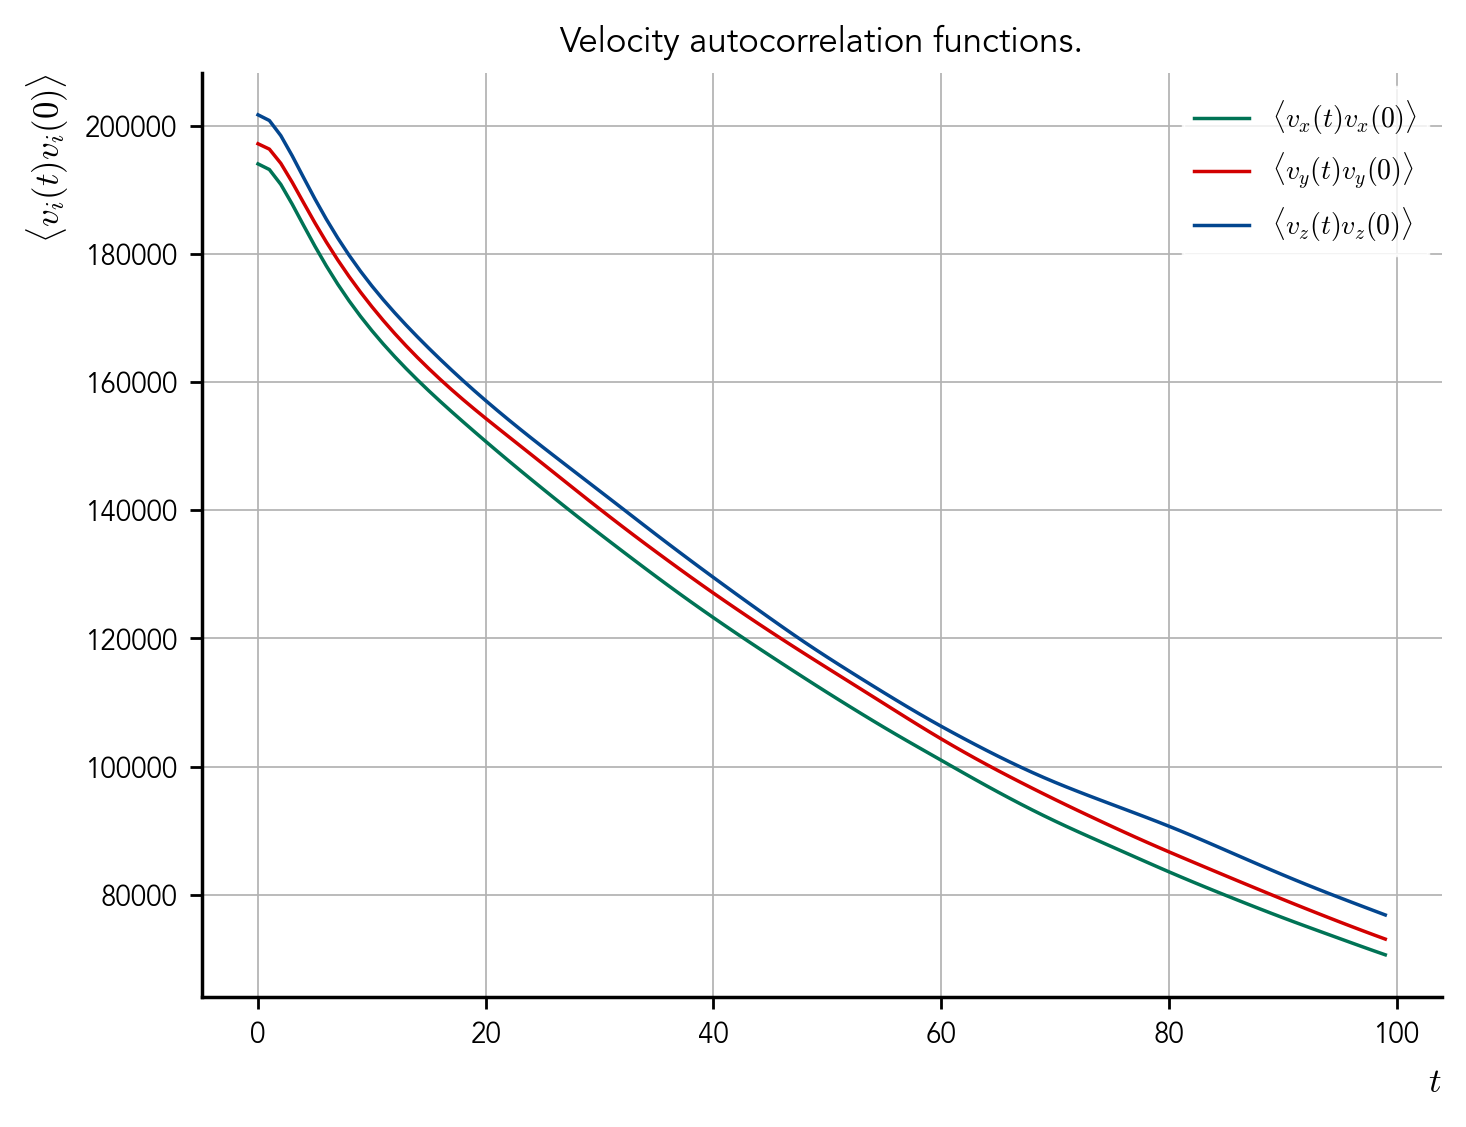

In [6]:
# plot the autocorrelation functions in a range around 0
plot_range = 100
plt.plot(aut_v_x[:plot_range], label=r'$\langle v_x(t) v_x(0) \rangle$')
plt.plot(aut_v_y[:plot_range], label=r'$\langle v_y(t) v_y(0) \rangle$')
plt.plot(aut_v_z[:plot_range], label=r'$\langle v_z(t) v_z(0) \rangle$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\langle v_i(t) v_i(0) \rangle$')
plt.legend()
plt.title(r'Velocity autocorrelation functions.')

In [ ]:
mean_square_displ_0 = mean_square_displacement(v_0, df_0['t'].to_numpy())

Calculating MSD:  99%|█████████▉| 198133/200000 [01:26<00:00, 21696.02it/s]/Users/jakub.dokulil/opt/anaconda3/envs/comp_phys/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jakub.dokulil/opt/anaconda3/envs/comp_phys/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Calculating MSD: 100%|██████████| 200000/200000 [01:26<00:00, 2311.43it/s] 


## calculation fot 1-st file

In [5]:
# read the files
df_1 = pd.read_csv("velocity_trajs/v_1.dat", sep=' ', header=None)
df_1.columns = ['t', 'v_x', 'v_y', 'v_z']

print("File read.")

# velocity autocorrelation functions
aut_v_x = velocity_autocorr(df_1['v_x'])
aut_v_y = velocity_autocorr(df_1['v_y'])
aut_v_z = velocity_autocorr(df_1['v_z'])

print("Correlations calculated.")

v_1 = np.array([df_1['v_x'].to_numpy(), df_1['v_y'].to_numpy(), df_1['v_z'].to_numpy()])


File read.
Correlations calculated.


In [ ]:
# plot the autocorrelation functions in a range around 0
plot_range = 100
plt.plot(aut_v_x[:plot_range], label=r'$\langle v_x(t) v_x(0) \rangle$')
plt.plot(aut_v_y[:plot_range], label=r'$\langle v_y(t) v_y(0) \rangle$')
plt.plot(aut_v_z[:plot_range], label=r'$\langle v_z(t) v_z(0) \rangle$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\langle v_i(t) v_i(0) \rangle$')
plt.legend()
plt.title(r'Velocity autocorrelation functions.')

In [ ]:
# calculate the diffusion constant
D_1 = diffusion_const_3d(df_1['t'].to_numpy(), v_1)

t = df_1['t'].to_numpy()[-1]   # Time limit
v = v_1

mean_square_displ_1 = mean_square_displ(t, v)

In [ ]:
mean_square_displ_1 = mean_square_displacement(v_1, df_1['t'].to_numpy())

Calculating MSD: 100%|██████████| 200000/200000 [01:53<00:00, 1754.41it/s] 


## calculation fot 2-nd file

In [ ]:
# read the files
df_2 = pd.read_csv("velocity_trajs/v_2.dat", sep=' ', header=None)
df_2.columns = ['t', 'v_x', 'v_y', 'v_z']

print("File read.")

# velocity autocorrelation functions
aut_v_x = velocity_autocorr(df_2['v_x'])
aut_v_y = velocity_autocorr(df_2['v_y'])
aut_v_z = velocity_autocorr(df_2['v_z'])

print("Correlations calculated.")

v_2 = np.array([df_2['v_x'].to_numpy(), df_2['v_y'].to_numpy(), df_2['v_z'].to_numpy()])


In [ ]:
# plot the autocorrelation functions in a range around 0
plot_range = 100
plt.plot(aut_v_x[:plot_range], label=r'$\langle v_x(t) v_x(0) \rangle$')
plt.plot(aut_v_y[:plot_range], label=r'$\langle v_y(t) v_y(0) \rangle$')
plt.plot(aut_v_z[:plot_range], label=r'$\langle v_z(t) v_z(0) \rangle$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\langle v_i(t) v_i(0) \rangle$')
plt.legend()
plt.title(r'Velocity autocorrelation functions.')

In [ ]:
# calculate the diffusion constant
D_2 = diffusion_const_3d(df_2['t'].to_numpy(), v_2)

t = df_2['t'].to_numpy()[-1]   # Time limit
v = v_2

mean_square_displ_1 = mean_square_displ(t, v)

In [ ]:
mean_square_displ_2 = mean_square_displacement(v_2, df_2['t'].to_numpy())

Calculating MSD:  24%|██▍       | 48067/200000 [00:47<01:54, 1327.51it/s]

## Results:

In [ ]:
print(f"Diffusion constant for 0-th file: {D_0}")
print(f"Diffusion constant for 1-th file: {D_1}")
print(f"Diffusion constant for 2-th file: {D_2}")

print("Mean Square Displacement for the 0-th file: ", mean_square_displ_0)
print("Mean Square Displacement for the 1-th file: ", mean_square_displ_1)
print("Mean Square Displacement for the 2-th file: ", mean_square_displ_2)